<img src = "https://global-uploads.webflow.com/5f0d53c042a9ed6288de7f8d/5f6337ae2cfaa10946ceeb06_Hacktiv8%20logo%20horizontal%2001%20black-p-500.png" width = 800>

# Assignment 3
### Sesi 13_PYTN-KS09-002
### Nama : Elsa Wulandari

# Project Overview

Tujuan project ini adalah melakukan klasifikasi yaitu untuk memprediksi apakah klien akan berlangganan (ya/tidak) deposito berjangka (variabel y).Dataset yang digunakan adalah terkait dengan penawaran dari lembaga perbankan Portugis.Penawaran pemasaran ini  didasarkan pada panggilan telepon yaitu satu kontak klien ke klien yang lain.

**Ada empat kumpulan data:**

1). bank-additional-full.csv dengan semua contoh (41188) dan 20 input, diurutkan berdasarkan tanggal (dari Mei 2008 hingga November 2010), sangat dekat dengan data yang dianalisis di [Moro et al., 2014] 

2). bank-additional.csv dengan 10% dari contoh (4119), dipilih secara acak dari 1), dan 20 input. 

3). bank-full.csv dengan semua contoh dan 17 input, diurutkan berdasarkan tanggal (versi lama dari kumpulan data ini dengan lebih sedikit input). 

4). bank.csv dengan 10% dari contoh dan 17 input, dipilih secara acak dari 3 (versi lama dari kumpulan data ini dengan lebih sedikit input). Kumpulan data terkecil disediakan untuk menguji algoritme pembelajaran mesin yang lebih menuntut komputasi (mis., SVM).


Data yang terdapat di dataset ini yaitu :

1. usia (numerik)
2. pekerjaan : jenis pekerjaan (kategoris: 'admin.','kerah biru','pengusaha','pembantu rumah tangga','manajemen' 'pensiunan','wiraswasta','jasa','mahasiswa' ,'teknisi','menganggur','tidak diketahui')
3. perkawinan : status perkawinan (kategori: 'cerai', 'menikah', 'lajang', 'tidak diketahui'; catatan: 'cerai' berarti cerai atau janda)
4. pendidikan (kategoris: 'dasar.4 tahun', 'dasar.6 tahun', 'dasar.9 tahun', 'sekolah menengah', 'buta huruf', 'kursus profesional', 'gelar universitas', 'tidak diketahui')
5. default: apakah kredit default? (kategoris: 'tidak', 'ya', 'tidak diketahui')
6. perumahan: memiliki pinjaman perumahan? (kategoris: 'tidak', 'ya', 'tidak diketahui')
7. pinjaman: memiliki pinjaman pribadi? (kategoris: 'tidak', 'ya', 'tidak diketahui')
8. kontak: jenis komunikasi kontak (kategori: 'seluler', 'telepon')
9. bulan: kontak terakhir bulan dalam setahun (kategoris: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. hari_minggu: hari kontak terakhir dalam seminggu (kategoris: 'sen','sel','rabu','kamis','jum')
11. durasi: durasi kontak terakhir, dalam detik (numerik). Catatan penting: atribut ini sangat mempengaruhi target keluaran (misalnya, jika durasi=0 maka y='tidak'). Namun, durasinya tidak diketahui sebelum panggilan dilakukan. Juga, setelah akhir panggilan y jelas diketahui. Dengan demikian, input ini hanya boleh dimasukkan untuk tujuan benchmark dan harus dibuang jika tujuannya adalah untuk memiliki model prediksi yang realistis.
12. kampanye: jumlah kontak yang dilakukan selama penawaran dan untuk klien  (numerik, termasuk kontak terakhir)
13. pdays: jumlah hari yang berlalu setelah klien terakhir dihubungi dari penawaran  sebelumnya (numerik; 999 berarti klien tidak pernah dihubungi sebelumnya)
14. sebelumnya: jumlah kontak yang dilakukan sebelum penawaran ini dan untuk klien ini (numerik)
15. hasil: hasil dari penawaran pemasaran sebelumnya (kategori: 'gagal', 'tidak ada', 'berhasil')
16. emp.var.rate: tingkat variasi pekerjaan - indikator triwulanan (numerik)
17. cons.price.idx: indeks harga konsumen - indikator bulanan (numerik)
18. cons.conf.idx: indeks kepercayaan konsumen - indikator bulanan (numerik)
19. euribor3m: tarif euribor 3 bulan - indikator harian (numerik)
20. nr.employed: jumlah karyawan - indikator triwulanan (numerik)




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, normalize
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm

In [2]:
# Membaca File
df = pd.read_csv("dataset/bank-additional.csv", sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


# 1. Exploratory & Cleaning Data

In [3]:
#Melihat columns apa saja yang ada di dataset
df.columns 

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [4]:
# informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [5]:
# melihat jumlah baris dan kolom pada dataset
df.shape

(4119, 21)

Dataset yang digunakan terdapat 21 kolom dan 4119 baris

In [6]:
# Cek apakah ada missing values di dataset tersebut.
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Setelah dilakukan checking missing value tenyata tidak ditemukan nilai yang missing

In [7]:
# melakukan rename pada kolom y menjadi status, untuk mengetahui klien sudah berlangganan deposito atau belum
df.rename(columns = {'y':'status'}, inplace = True)

In [8]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,status
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


Dapat dilihat bahwa nama columns telah direname menjadi status

# 2 . Exploratory Data Visualization (EDA)

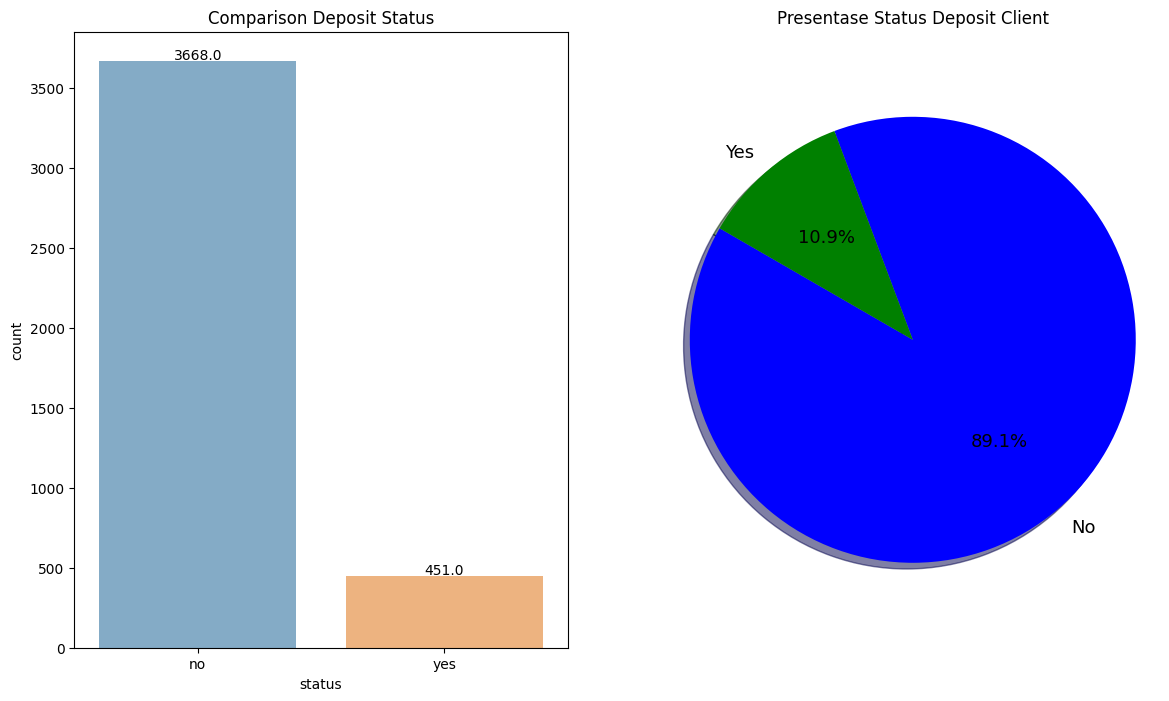

In [9]:
# membuat barchart 
df['status'].value_counts().plot(kind="barh", figsize=(14,8))
plt.subplot(121)
plt.title("Comparison Deposit Status")
ax = sns.countplot(x='status', data=df, alpha=0.6)
for i in ax.patches:
    ax.annotate(format(i.get_height(),'.1f'), (i.get_x() + i.get_width()/2.,i.get_height()),
               ha='center', va='center', xytext=(0,4), textcoords='offset points')

# membuat pie chart untuk melihat presentase client 
plt.subplot(122)
plt.title("Presentase Status Deposit Client")
status_values_count = df['status'].value_counts()
status_size = status_values_count.values.tolist()
status_labels = 'No', 'Yes'
colors=['blue','green']
pcs, texts, autotexts = plt.pie(status_size, labels=status_labels, colors=colors,
                             autopct='%1.1f%%', shadow=True, startangle=150)

for text, autotext in zip(texts, autotexts):
    text.set_fontsize(13)
    autotext.set_fontsize(13)

plt.axis('equal')
plt.show()

**Conclusion**

Dapat dilihat bahwa banyak client yang menolak untuk melakukan deposit.

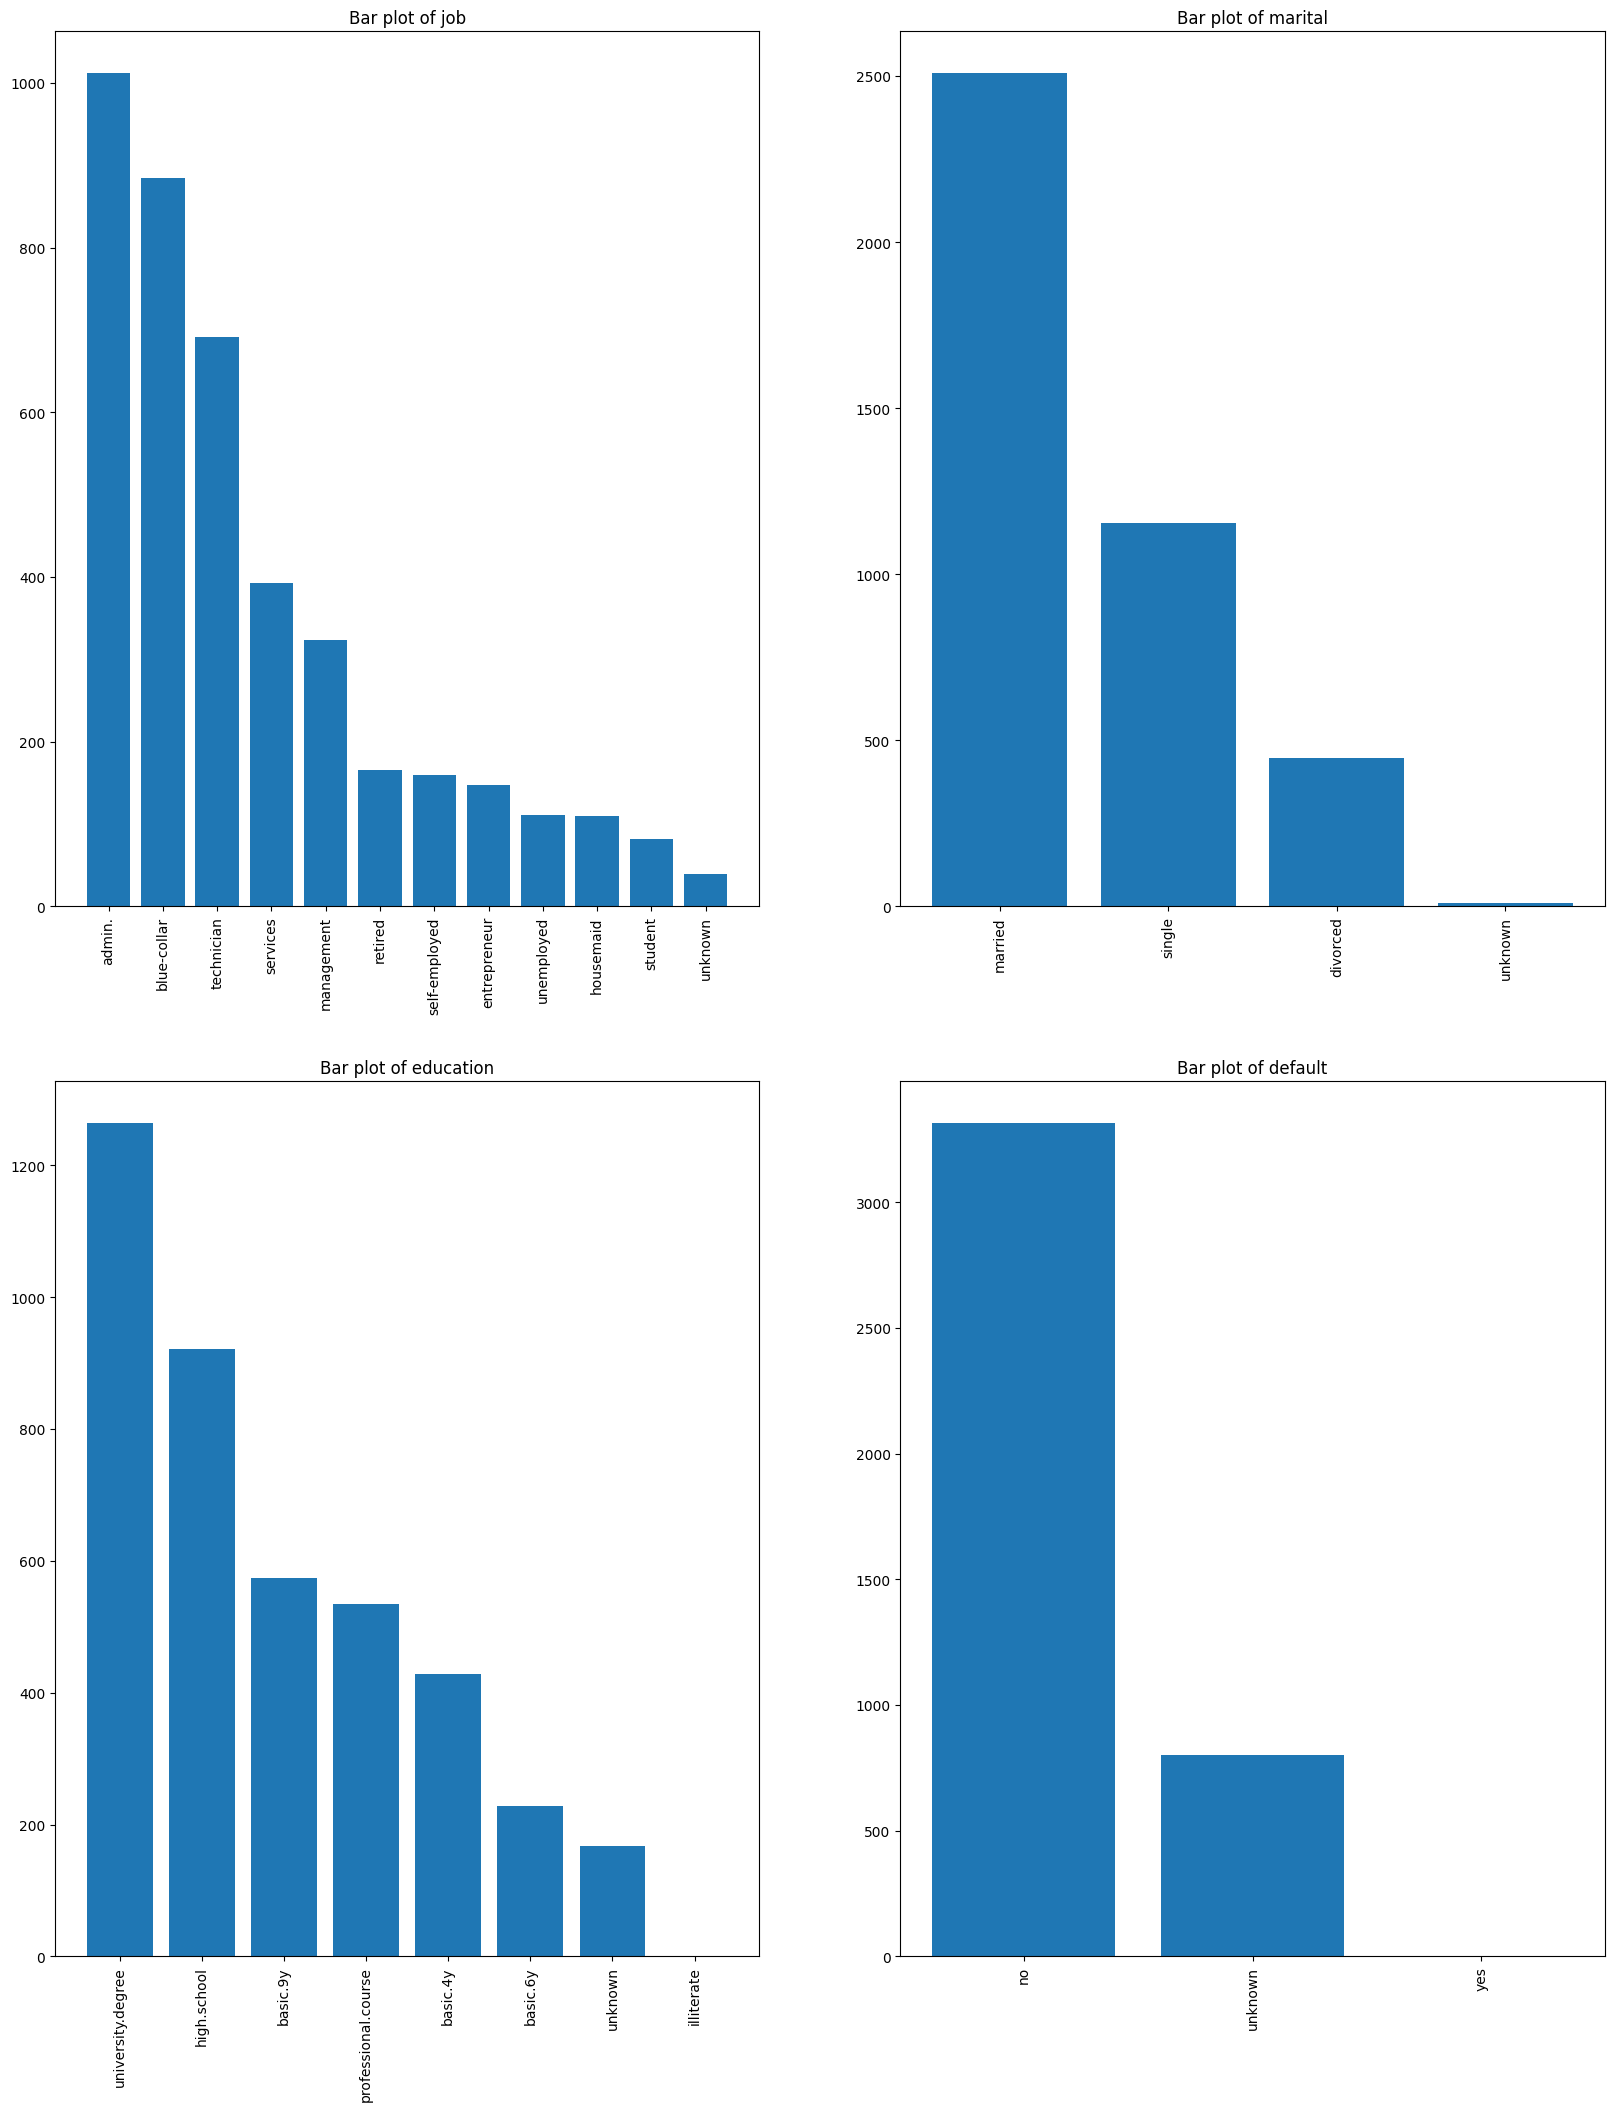

In [10]:
# Melihat bentuk barchart dari beberapa columns

Katg_col = ['job','marital','education','default']
fig, ax = plt.subplots(2,2, sharex=False, sharey=False, figsize=(20, 25))
count = 0
for cat_col in Katg_col:
    value_count = df[cat_col].value_counts()
    ax_x = count//2
    ax_y = count%2
    x_range = np.arange(0, len(value_count))
    ax[ax_x, ax_y].bar(x_range, value_count.values, tick_label=value_count.index)
    ax[ax_x, ax_y].set_title(f"Bar plot of {cat_col}")
    
    for i in ax[ax_x, ax_y].get_xticklabels():
        i.set_rotation(90)
    
    count+=1
plt.show()
    

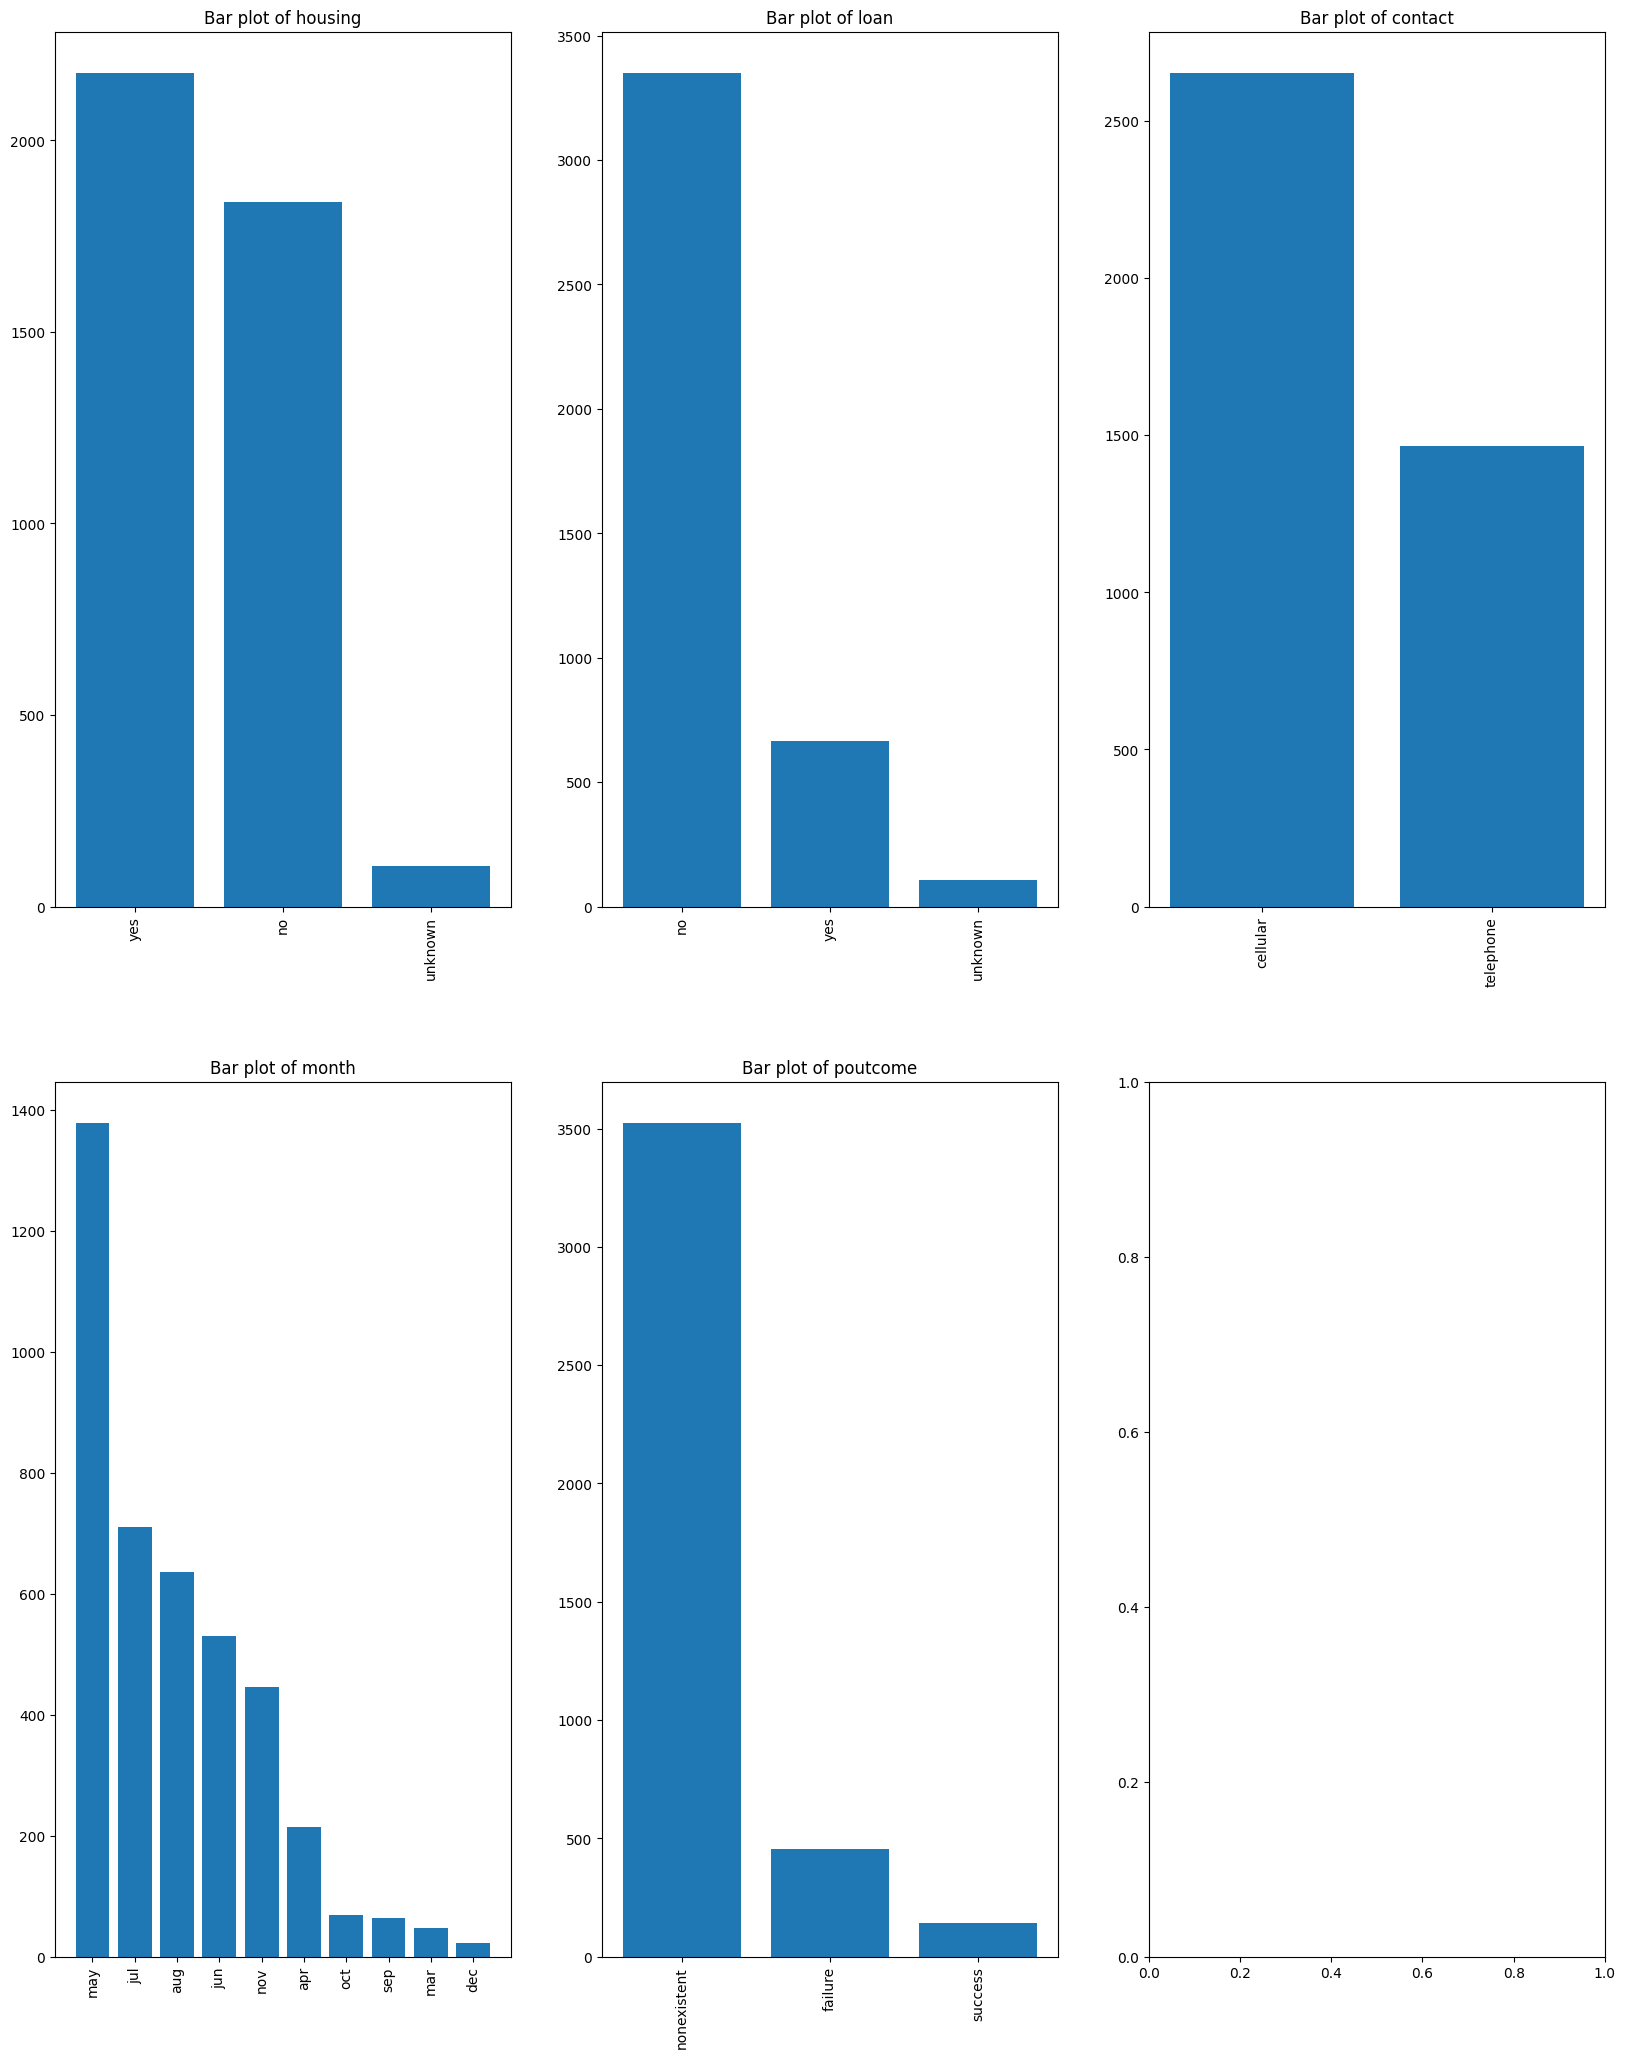

In [11]:
Katg_col = ['housing','loan','contact','month','poutcome']
fig, ax = plt.subplots(2,3, sharex=False, sharey=False, figsize=(20,25))
count = 0
for cat_col in Katg_col:
    value_count = df[cat_col].value_counts()
    ax_x = count//3
    ax_y = count%3
    x_range = np.arange(0, len(value_count))
    ax[ax_x, ax_y].bar(x_range, value_count.values, tick_label=value_count.index)
    ax[ax_x, ax_y].set_title(f"Bar plot of {cat_col}")
    
    for i in ax[ax_x, ax_y].get_xticklabels():
        i.set_rotation(90)
    
    count+=1
plt.show()

**Conclusion**
1. Pekerjaan sebagai admin adalah data yang paling banyak diambil
2. Kebanyakan data merupakan orang yang berstatus married dan merupakan lulusan universitas.
3. Kebanyakan data tidak memiliki kredit default
4. Kebanyakan data memiliki pinjaman perumahan
5. Kebanyakan data memiliki pinjaman pribadi
6. Kebanyakan data lebih memiliki jenis komunikasi seluler dibandingkan telephone
7. Kebanyakan data memiliki kontak terakhir pada bulan may
8. Kebanyakan hasil dari kampanye pemasaran sebelumnya tidak ada 

# 3 . Preprocessing

In [12]:
# proses encoding yaitu mengubah data nominal menjadi data numerikal.
df['job'] = LabelEncoder().fit_transform(df['job'])
df['marital'] = LabelEncoder().fit_transform(df['marital'])
df['education'] = LabelEncoder().fit_transform(df['education'])
df['default'] = LabelEncoder().fit_transform(df['default'])
df['housing'] = LabelEncoder().fit_transform(df['housing'])
df['loan'] = LabelEncoder().fit_transform(df['loan'])
df['contact'] = LabelEncoder().fit_transform(df['contact'])
df['month'] = LabelEncoder().fit_transform(df['month'])
df['day_of_week'] = LabelEncoder().fit_transform(df['day_of_week'])
df['poutcome'] = LabelEncoder().fit_transform(df['poutcome'])
df['status'] = LabelEncoder().fit_transform(df['status'])

df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,status
0,30,1,1,2,0,2,0,0,6,0,...,2,999,0,1,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,7,2,3,0,0,0,1,6,0,...,4,999,0,1,1.1,93.994,-36.4,4.855,5191.0,0
2,25,7,1,3,0,2,0,1,4,4,...,1,999,0,1,1.4,94.465,-41.8,4.962,5228.1,0
3,38,7,1,2,0,1,1,1,4,0,...,3,999,0,1,1.4,94.465,-41.8,4.959,5228.1,0
4,47,0,1,6,0,2,0,0,7,1,...,1,999,0,1,-0.1,93.200,-42.0,4.191,5195.8,0


In [13]:
# meengecek apakah  data sudah menjadi tipe numerik
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   int32  
 2   marital         4119 non-null   int32  
 3   education       4119 non-null   int32  
 4   default         4119 non-null   int32  
 5   housing         4119 non-null   int32  
 6   loan            4119 non-null   int32  
 7   contact         4119 non-null   int32  
 8   month           4119 non-null   int32  
 9   day_of_week     4119 non-null   int32  
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   int32  
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

Dapat dilihat bahwa semua data telah bertipe numerik

In [14]:
# memilih feature
X = df.drop('status', axis=1)

In [15]:
# memilih target
y = df['status']

In [16]:
# spliting data training 70% dan data testing 30%
X_training, X_testing, y_training, y_testing = train_test_split(X , y, shuffle = True, test_size = 0.3, random_state = 42)

# scaling data
scaler = StandardScaler()
scaler.fit(X_training)

# Transformasi data
scaled = scaler.transform(X_training)
scaled = scaler.transform(X_testing)

print('hasil feature data train =', X_training.shape)
print('hasil target data train =', y_training.shape)
print('hasil feature data test =', X_testing.shape)
print('hasil target data test =', y_testing.shape)

hasil feature data train = (2883, 20)
hasil target data train = (2883,)
hasil feature data test = (1236, 20)
hasil target data test = (1236,)


Dapat dilihat bahwa data trainingnya adalah sebanyak **2883** dan data testing adalah sebanyak **1236**

# 4. Modeling



### A. Logistic Regression
Logistic Regression adalah sebuah algoritma klasifikasi untuk mencari hubungan antara fitur (input) diskrit/kontinu dengan probabilitas hasil output diskrit tertentu.

**Model Algoritma Logistic Regression**

In [18]:
Lg_Reg= LogisticRegression()
Lg_Reg.fit(X_training, y_training)
predic = Lg_Reg.predict(X_testing)

c:\Users\acer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

**Melihat accuracy Logistic Regression**

In [20]:
print('Nilai Accuracy :',accuracy_score(y_testing, predic))
print(classification_report(y_testing, predic))



Nilai Accuracy : 0.9085760517799353
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1105
           1       0.60      0.40      0.48       131

    accuracy                           0.91      1236
   macro avg       0.77      0.69      0.72      1236
weighted avg       0.90      0.91      0.90      1236



**Mengiplementasikan confusion matrix**

In [21]:
matrix = confusion_matrix(y_testing, predic)
print('Hasil Confusion Matrix\n', matrix)

Hasil Confusion Matrix
 [[1070   35]
 [  78   53]]


In [22]:
tn, fp, fn, tp = matrix.ravel()
print(f'True Negative : {tn}')
print(f'False Positive : {fp}')
print(f'False Positive : {fn}')
print(f'True Positive : {tp}')

True Negative : 1070
False Positive : 35
False Positive : 78
True Positive : 53


### B. K - Nearest Neighbors (KNN)

Algoritma k-Nearest Neighbor adalah algoritma supervised
learning dimana hasil dari instance yang baru diklasifikasikan berdasarkan mayoritas dari kategori k-tetangga terdekat.
Tujuan dari algoritma ini adalah untuk mengklasifikasikan obyek baru berdasarkan atribut dan sample-sample dari training data.

**Model Algoritma K - Nearest Neighbors (KNN)**

In [23]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_training, y_training)
y_KNN = model_knn.predict(X_testing)

**Melihat accuracy K - Nearest Neighbors (KNN)**

In [24]:
print('Nilai Accuracy :', accuracy_score(y_testing, y_pred1))
print(classification_report(y_testing, y_KNN))

NameError: name 'y_pred1' is not defined

**Mengiplementasikan confusion matrix**

In [ ]:
matrix = confusion_matrix(y_testing, y_KNN)
print('Hasil Confusion Martrix\n', matrix)

Hasil Confusion Martrix
 [[1052   53]
 [  80   51]]


In [ ]:
tn, fp, fn, tp = matrix.ravel()
print(f'True Negative : {tn}')
print(f'False Positive : {fp}')
print(f'False Positive : {fn}')
print(f'True Positive : {tp}')

True Negative : 1052
False Positive : 53
False Positive : 80
True Positive : 51


### C. Support Vector Machine (SVM)

Support Vector Machine atau SVM adalah algoritme pembelajaran mesin yang diawasi yang dapat digunakan untuk klasifikasi dan regresi. Cara kerja SVM didasarkan pada SRM atau Structural Risk Minimization yang dirancang untuk mengolah data menjadi Hyperplane yang mengklasifikasikan ruang input menjadi dua kelas

In [ ]:
# import svm
from sklearn import svm

**Model Algoritma Support Vector Machine (SVM)**

In [ ]:
svm_model = svm.SVC()
svm_model.fit(X_training, y_training)
y_SVM=svm_model.predict(X_testing)

**Melihat accuracy Support Vector Machine (SVM)**

In [ ]:
print("Acc: ", metrics.accuracy_score(y_testing, y_SVM))
print(metrics.classification_report(y_testing, y_SVM))

Acc:  0.906957928802589
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      1105
           1       0.70      0.21      0.33       131

    accuracy                           0.91      1236
   macro avg       0.81      0.60      0.64      1236
weighted avg       0.89      0.91      0.88      1236



**Mengiplementasikan confusion matrix**

In [ ]:
matrix = confusion_matrix(y_testing, y_SVM)
print('Hasil Confusion Matrix \n', matrix)

Hasil Confusion Matrix 
 [[1093   12]
 [ 103   28]]


In [ ]:
tn, fp, fn, tp = matrix.ravel()
print(f'True Negative : {tn}')
print(f'False Positive : {fp}')
print(f'False Positive : {fn}')
print(f'True Positive : {tp}')

True Negative : 1093
False Positive : 12
False Positive : 103
True Positive : 28


### D . Decision tree 

Decision tree adalah jenis algoritma klasifikasi yang strukturnya mirip seperti sebuah pohon yang memiliki akar, ranting, dan daun. Simpul akar (internal node) mewakili fitur pada dataset, simpul ranting (branch node) mewakili aturan keputusan (decision rule), dan tiap-tiap simpul daun (leaf node) mewakili hasil keluaran.


**Model Algoritma Decision Tree**

In [ ]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_training, y_training)
y_DT = model_dt.predict(X_testing)

**Melihat accuracy Algoritma Decision Tree**

In [ ]:
print('Nilai Accuracy :', accuracy_score(y_testing, y_DT))
print(classification_report(y_testing, y_DT))


Nilai Accuracy : 0.8818770226537217
              precision    recall  f1-score   support

           0       0.95      0.92      0.93      1105
           1       0.45      0.56      0.50       131

    accuracy                           0.88      1236
   macro avg       0.70      0.74      0.72      1236
weighted avg       0.89      0.88      0.89      1236



**Mengiplementasikan confusion matrix**

In [ ]:
matrix = confusion_matrix(y_testing, y_DT)
print('Hasil Confusion Matrix \n', matrix)

Hasil Confusion Matrix 
 [[1016   89]
 [  57   74]]


In [ ]:
tn, fp, fn, tp = matrix.ravel()
print(f'True Negative : {tn}')
print(f'False Positive : {fp}')
print(f'False Positive : {fn}')
print(f'True Positive : {tp}')

True Negative : 1016
False Positive : 89
False Positive : 57
True Positive : 74


### E . Random Forest

Random Forest adalah algoritma machine learning yang menggabungkan keluaran dari beberapa decision tree untuk mencapai satu hasil. Sesuai namanya, Forest atau 'hutan' dibentuk dari banyak tree (pohon) yang diperoleh melalui proses bagging atau bootstrap aggregating.

**Model Algoritma Random Forets**

In [ ]:
model_rf = RandomForestClassifier()
model_rf.fit(X_training, y_training)
y_RF = model_rf.predict(X_testing)

**Melihat accuracy Algoritma Random Forest**

In [ ]:
print('Nilai Accuracy :', accuracy_score(y_testing, y_RF))
print(classification_report(y_testing, y_RF))

Nilai Accuracy : 0.9053398058252428
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      1105
           1       0.57      0.44      0.49       131

    accuracy                           0.91      1236
   macro avg       0.75      0.70      0.72      1236
weighted avg       0.90      0.91      0.90      1236



**Mengiplementasikan confusion matrix**

In [ ]:
matrix = confusion_matrix(y_testing, y_RF)
print('Hasil Confusion Matrix \n', matrix)

Hasil Confusion Matrix 
 [[1062   43]
 [  74   57]]


In [ ]:
tn, fp, fn, tp = matrix.ravel()
print(f'True Negative : {tn}')
print(f'False Positive : {fp}')
print(f'False Positive : {fn}')
print(f'True Positive : {tp}')

True Negative : 1062
False Positive : 43
False Positive : 74
True Positive : 57


### F . Naive Bayes

Naïve Bayes Classifier merupakan sebuah metoda klasifikasi yang berakar pada teorema Bayes . Metode pengklasifikasian dg menggunakan metode probabilitas dan statistik

**Model Algoritma Naive Bayes**

In [ ]:
model_nb = GaussianNB()
model_nb.fit(X_training, y_training)
y_NB = model_nb.predict(X_testing)

**Melihat accuracy Algoritma Naive Bayes**

In [ ]:
print('Nilai Accuracy :', accuracy_score(y_testing, y_NB))
print(classification_report(y_testing, y_NB))

Nilai Accuracy : 0.8470873786407767
              precision    recall  f1-score   support

           0       0.95      0.88      0.91      1105
           1       0.36      0.59      0.45       131

    accuracy                           0.85      1236
   macro avg       0.66      0.73      0.68      1236
weighted avg       0.89      0.85      0.86      1236



**Mengiplementasikan confusion matrix**

In [ ]:
matrix = confusion_matrix(y_testing, y_NB)
print('Hasil Confusion Matrix \n', matrix)

Hasil Confusion Matrix 
 [[970 135]
 [ 54  77]]


In [ ]:
tn, fp, fn, tp = matrix.ravel()
print(f'True Negative : {tn}')
print(f'False Positive : {fp}')
print(f'False Positive : {fn}')
print(f'True Positive : {tp}')

True Negative : 970
False Positive : 135
False Positive : 54
True Positive : 77


# 5. Algorithm Analysis

In [ ]:
# Hasil accuracy dari setiap Algoritma
print("- Logistic Regression            :", accuracy_score(y_testing, predic))
print("- K-Nearest Neighbors (KNN)      :", accuracy_score(y_testing, y_KNN))
print("- Support Vector Machine (SVM)   :", accuracy_score(y_testing, y_SVM))
print("- Decision Tree                  :", accuracy_score(y_testing, y_DT))
print("- Random Forest                  :", accuracy_score(y_testing, y_RF))
print("- Naive Bayes                    :", accuracy_score(y_testing, y_NB))

- Logistic Regression            : 0.9085760517799353
- K-Nearest Neighbors (KNN)      : 0.8923948220064725
- Support Vector Machine (SVM)   : 0.906957928802589
- Decision Tree                  : 0.8818770226537217
- Random Forest                  : 0.9053398058252428
- Naive Bayes                    : 0.8470873786407767


Berdasarkan klasifikasi diatas maka  Algoritma Logistic Regression merupakan algoritma yang memiliki accuracy paling baik diantara algoritma yang lain,yaitu dengan accuracy yang mencapai 0,90857.